# Recreating training and test data
Here, we are trying to preserve the order in which rentals happen in a given timeline. Also, the scope of forecasting is being reduced to study the effect on performance.

In [1]:
# Importing
import pandas as pd
selected_rentals = pd.read_csv(r"C:\Users\singh\Desktop\TUD (All Semesters)\Courses - Semester 5 (TU Dresden)\Research Task - Spatial Modelling\Code\rentals_near200_st.csv")

# Only preserving temporal information, after sorting
selected_rentals = selected_rentals[["#_rentals", "year", "month", "day", "hour", "ID"]]
selected_rentals.sort_values(by=["ID","year","month","day","hour"], ignore_index=True, inplace=True)
selected_rentals.head()

,#_rentals,year,month,day,hour,ID
0,0,2023,12,31,8,0
1,0,2023,12,31,10,0
2,0,2023,12,31,12,0
3,0,2023,12,31,14,0
4,0,2023,12,31,16,0


In [2]:
selected_rentals[:20]

,#_rentals,year,month,day,hour,ID
0,0,2023,12,31,8,0
1,0,2023,12,31,10,0
2,0,2023,12,31,12,0
3,0,2023,12,31,14,0
4,0,2023,12,31,16,0
5,0,2023,12,31,18,0
6,0,2023,12,31,20,0
7,0,2024,1,1,8,0
8,0,2024,1,1,10,0
9,0,2024,1,1,12,0


In [3]:
# Station with ID 732 seems to have very high demand
selected_rentals[selected_rentals["#_rentals"]==78]

,#_rentals,year,month,day,hour,ID
54582,78,2024,4,20,14,732


In [4]:
# Total stations included
len(selected_rentals["ID"].unique())

200

The scope of target dataset is reduced to 3 days.

In [5]:
# Chosen station ID = 0

# training data: target
y_train_0 = selected_rentals.loc[(selected_rentals["ID"] == 0) & ~(selected_rentals["month"] == 4), "#_rentals"]

# test data: target
y_test_0 = selected_rentals.loc[(selected_rentals["year"] == 2024) & (selected_rentals["month"] == 4) & (selected_rentals["ID"] == 0) & (selected_rentals["day"] <= 3), "#_rentals"]

# training data: feature
X_train_0 = selected_rentals.loc[(selected_rentals["ID"] == 0) & ~(selected_rentals["month"] == 4), ["year", "month", "day", "hour"]]

# test data: feature
X_test_0 = selected_rentals.loc[(selected_rentals["ID"] == 0) & (selected_rentals["month"] == 4) & (selected_rentals["day"] <= 3), ["year", "month", "day", "hour"]]

In [6]:
# random forest

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train_0, y_train_0)

# training performance
y_train_pred = forest.predict(X_train_0)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_train_0, y_train_pred),r2_score(y_train_0, y_train_pred))

0.43352049689440986 0.8631576952818184


In [7]:
# performance on test set
y_test_pred = forest.predict(X_test_0)
print(mean_squared_error(y_test_0, y_test_pred),r2_score(y_test_0, y_test_pred))

4.91577619047619 -1.2120992857142845


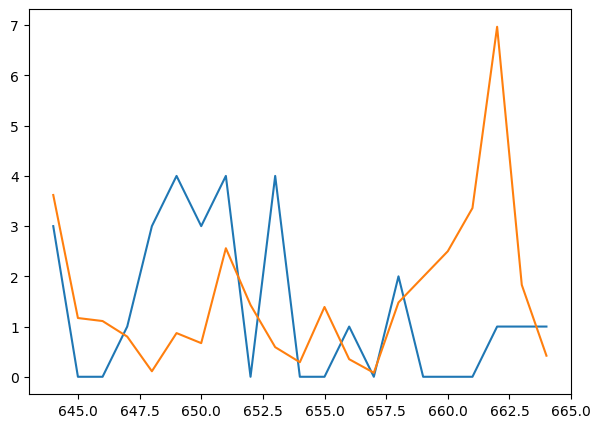

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(y_test_0.index, y_test_0)
plt.plot(y_test_0.index, y_test_pred)
plt.show()

Performance from tree-based learners is just extremely bad!

### Station 732
This station seems to have very high demand. Maybe trying on this station might help us a little.

In [9]:
# Chosen station ID = 732

# training data: target
y_train_732 = selected_rentals.loc[(selected_rentals["ID"] == 732) & ~(selected_rentals["month"] == 4), "#_rentals"]

# test data: target
y_test_732 = selected_rentals.loc[(selected_rentals["year"] == 2024) & (selected_rentals["month"] == 4) & (selected_rentals["ID"] == 732) & (selected_rentals["day"] <= 3), "#_rentals"]

# training data: feature
X_train_732 = selected_rentals.loc[(selected_rentals["ID"] == 732) & ~(selected_rentals["month"] == 4), ["year", "month", "day", "hour"]]

# test data: feature
X_test_732 = selected_rentals.loc[(selected_rentals["ID"] == 732) & (selected_rentals["month"] == 4) & (selected_rentals["day"] <= 3), ["year", "month", "day", "hour"]]

In [10]:
# random forest

# training the model
from sklearn.ensemble import RandomForestRegressor
forest732 = RandomForestRegressor(random_state=2) 
forest732.fit(X_train_732, y_train_732)

# training performance
y_train_pred_732 = forest732.predict(X_train_732)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_train_732, y_train_pred_732),r2_score(y_train_732, y_train_pred_732))

2.110058695652174 0.9441637464051855


In [11]:
# performance on test set
y_test_pred_732 = forest732.predict(X_test_732)
print(mean_squared_error(y_test_732, y_test_pred_732),r2_score(y_test_732, y_test_pred_732))

184.82964285714286 -24.71289353312304


# Combining stations together
Here, no single station is considered. Instead all the stations are combined together during training. This means that the learner will also take information from other stations while making a prediction.

In [12]:
# Importing
import pandas as pd
selected_rentals = pd.read_csv(r"C:\Users\singh\Desktop\TUD (All Semesters)\Courses - Semester 5 (TU Dresden)\Research Task - Spatial Modelling\Code\rentals_near200_st.csv")

# Only preserving temporal information, after sorting
selected_rentals = selected_rentals[["#_rentals", "year", "month", "day", "hour", "ID"]]
selected_rentals.sort_values(by=["ID","year","month","day","hour"], ignore_index=True, inplace=True)
selected_rentals.head()

,#_rentals,year,month,day,hour,ID
0,0,2023,12,31,8,0
1,0,2023,12,31,10,0
2,0,2023,12,31,12,0
3,0,2023,12,31,14,0
4,0,2023,12,31,16,0


In [13]:
# training data
# training data: target
y_train = selected_rentals.loc[~(selected_rentals["month"] == 3) & ~(selected_rentals["month"] == 4), "#_rentals"]

# test data: target (scope reduced to 3 days)
y_test = selected_rentals.loc[(selected_rentals["year"] == 2024) & (selected_rentals["month"] == 3) & (selected_rentals["day"] <= 4), "#_rentals"]

# training data: feature
X_train = selected_rentals.loc[~(selected_rentals["month"] == 3) & ~(selected_rentals["month"] == 4), ["year", "month", "day", "hour"]]

# test data: feature (scope reduced to 3 days)
X_test = selected_rentals.loc[(selected_rentals["month"] == 3) & (selected_rentals["day"] <= 4), ["year", "month", "day", "hour"]]

In [14]:
# random forest

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42) 
forest.fit(X_train, y_train)

# testing performance
y_test_pred = forest.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

6.619121549419506 0.04313349896381613


Some observations:
- With less training data (only 2 months) performance of random forest improved (r2 score was no longer negative).
- With more training data (3 months) performance of random forest was disastorous (negative r2 score).

## Corrective Measures
This method of applying random forest may not be very accurate. Using *dummy variables* will likely improve the performance. Some suggestions for performance improvements:
- Remove 2023 data
- Add day of week
- Use dummies for categorical data

Still no information about spatial information or *time-focused* features have been <u>engineered</u>.

In [15]:
# Importing
import pandas as pd
selected_rentals = pd.read_csv(r"C:\Users\singh\Desktop\TUD (All Semesters)\Courses - Semester 5 (TU Dresden)\Research Task - Spatial Modelling\Code\rentals_near200_st.csv")
selected_rentals.columns

Index(['name', 'lat', 'lng', 'datetime', '#_rentals', 'year', 'month', 'day',
       'hour', 'ID', 'coordinates'],
      dtype='object')

In [16]:
# remove 2023 data
selected_rentals = selected_rentals[~(selected_rentals["year"]==2023)]
selected_rentals.head()

,name,lat,lng,datetime,#_rentals,year,month,day,hour,ID,coordinates
1,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 10:00:00.000,1,2024,3,28,10,0,POINT (-73.9383 40.7923272)
2,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 12:00:00.000,1,2024,3,28,12,0,POINT (-73.9383 40.7923272)
3,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 14:00:00.000,1,2024,3,28,14,0,POINT (-73.9383 40.7923272)
4,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 16:00:00.000,3,2024,3,28,16,0,POINT (-73.9383 40.7923272)
5,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 18:00:00.000,2,2024,3,28,18,0,POINT (-73.9383 40.7923272)


In [17]:
# Add day_of_week 
selected_rentals['day_name'] = pd.Series([x.day_name() for x in pd.to_datetime(selected_rentals["datetime"])])
selected_rentals.head()

,name,lat,lng,datetime,#_rentals,year,month,day,hour,ID,coordinates,day_name
1,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 10:00:00.000,1,2024,3,28,10,0,POINT (-73.9383 40.7923272),Thursday
2,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 12:00:00.000,1,2024,3,28,12,0,POINT (-73.9383 40.7923272),Thursday
3,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 14:00:00.000,1,2024,3,28,14,0,POINT (-73.9383 40.7923272),Thursday
4,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 16:00:00.000,3,2024,3,28,16,0,POINT (-73.9383 40.7923272),Thursday
5,1 Ave & E 110 St,40.792327,-73.9383,2024-03-28 18:00:00.000,2,2024,3,28,18,0,POINT (-73.9383 40.7923272),Tuesday


In [18]:
# refining columns: minimising categorcial columns for random forest 
selected_rentals = selected_rentals[["#_rentals","month","day","hour", "ID", "day_name"]]
selected_rentals.head()

,#_rentals,month,day,hour,ID,day_name
1,1,3,28,10,0,Thursday
2,1,3,28,12,0,Thursday
3,1,3,28,14,0,Thursday
4,3,3,28,16,0,Thursday
5,2,3,28,18,0,Tuesday


In [19]:
# Add dummies for day_name and station ID
selected_rentals = pd.get_dummies(selected_rentals, columns = ["ID", "day_name"], drop_first=False)
selected_rentals.head()

,#_rentals,month,day,hour,ID_0,ID_9,ID_54,ID_55,ID_62,ID_63,...,ID_2064,ID_2065,ID_2074,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
1,1,3,28,10,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,3,28,12,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,3,28,14,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,3,3,28,16,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,2,3,28,18,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Now, you have dummy variables for both **ID** and **week of day**.

### Trimming the data for January
For improving performance of random forest, only the data for the month of Jan is considered. First 25 days are for training and the remaining days are for testing.

In [20]:
list(selected_rentals.columns)[1:]

['month',
 'day',
 'hour',
 'ID_0',
 'ID_9',
 'ID_54',
 'ID_55',
 'ID_62',
 'ID_63',
 'ID_66',
 'ID_67',
 'ID_72',
 'ID_74',
 'ID_75',
 'ID_76',
 'ID_77',
 'ID_78',
 'ID_83',
 'ID_85',
 'ID_90',
 'ID_91',
 'ID_92',
 'ID_101',
 'ID_102',
 'ID_103',
 'ID_113',
 'ID_114',
 'ID_115',
 'ID_124',
 'ID_133',
 'ID_134',
 'ID_143',
 'ID_150',
 'ID_154',
 'ID_156',
 'ID_157',
 'ID_168',
 'ID_169',
 'ID_184',
 'ID_185',
 'ID_281',
 'ID_286',
 'ID_287',
 'ID_292',
 'ID_293',
 'ID_294',
 'ID_439',
 'ID_482',
 'ID_483',
 'ID_484',
 'ID_485',
 'ID_486',
 'ID_487',
 'ID_488',
 'ID_489',
 'ID_499',
 'ID_505',
 'ID_506',
 'ID_507',
 'ID_535',
 'ID_616',
 'ID_631',
 'ID_634',
 'ID_663',
 'ID_664',
 'ID_665',
 'ID_732',
 'ID_734',
 'ID_735',
 'ID_736',
 'ID_791',
 'ID_793',
 'ID_801',
 'ID_819',
 'ID_823',
 'ID_861',
 'ID_891',
 'ID_892',
 'ID_893',
 'ID_894',
 'ID_895',
 'ID_896',
 'ID_901',
 'ID_902',
 'ID_903',
 'ID_904',
 'ID_905',
 'ID_906',
 'ID_907',
 'ID_908',
 'ID_911',
 'ID_912',
 'ID_913',
 'ID

In [21]:
# training data
X_train = selected_rentals.loc[(selected_rentals["day"] <=25) & (selected_rentals["month"] == 1),list(selected_rentals.columns)[1:]]
y_train = selected_rentals.loc[(selected_rentals["day"] <=25) & (selected_rentals["month"] == 1), "#_rentals"]

In [22]:
# test data
X_test = selected_rentals.loc[(selected_rentals["day"] >25) & (selected_rentals["month"] == 1),list(selected_rentals.columns)[1:]]
y_test = selected_rentals.loc[(selected_rentals["day"] >25) & (selected_rentals["month"] == 1), "#_rentals"]

In [23]:
# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

2.4366826190476187 0.333638405742788


### Trimming the data for February
The month of *Feb* is considered to see how the performance varies compared to the month of *January*. First 25 days are for training and the remaining days are for testing.

In [24]:
# training data
X_train = selected_rentals.loc[(selected_rentals["day"] <=25) & (selected_rentals["month"] == 2),list(selected_rentals.columns)[1:]]
y_train = selected_rentals.loc[(selected_rentals["day"] <=25) & (selected_rentals["month"] == 2), "#_rentals"]

X_test = selected_rentals.loc[(selected_rentals["day"] >25) & (selected_rentals["month"] == 2),list(selected_rentals.columns)[1:]]
y_test = selected_rentals.loc[(selected_rentals["day"] >25) & (selected_rentals["month"] == 2), "#_rentals"]

# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

2.6782899642857143 0.2688827220789938


### Trimming the data for March
The month of *Mar* is considered to see how the performance varies compared to the month of *January* and *February*. First 25 days are for training and the remaining days are for testing.

In [25]:
# training data
X_train = selected_rentals.loc[(selected_rentals["day"] <=25) & (selected_rentals["month"] == 3),list(selected_rentals.columns)[1:]]
y_train = selected_rentals.loc[(selected_rentals["day"] <=25) & (selected_rentals["month"] == 3), "#_rentals"]

X_test = selected_rentals.loc[(selected_rentals["day"] >25) & (selected_rentals["month"] == 3),list(selected_rentals.columns)[1:]]
y_test = selected_rentals.loc[(selected_rentals["day"] >25) & (selected_rentals["month"] == 3), "#_rentals"]

# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

4.815328166666666 0.31726163037352306


### Trimming the data even further : *This definitely doesn't work!*
It can become very overwhelming for Random forest learner to handle huge amounts of data. To work with that, here we're trying to train just on two week data and then predict the rentals for **coming 2 days**. Here, only the month of January is considered.

In [26]:
# training data : Only 2 weeks
X_train = selected_rentals.loc[(selected_rentals["day"] <=14) & (selected_rentals["month"] == 1),list(selected_rentals.columns)[1:]]
y_train = selected_rentals.loc[(selected_rentals["day"] <=14) & (selected_rentals["month"] == 1), "#_rentals"]

# testing data: Only the next 2 days
X_test = selected_rentals.loc[(selected_rentals["day"] >14) & (selected_rentals["month"] == 1) & (selected_rentals["day"] <= 16),list(selected_rentals.columns)[1:]]
y_test = selected_rentals.loc[(selected_rentals["day"] >14) & (selected_rentals["month"] == 1) & (selected_rentals["day"] <= 16), "#_rentals"]

# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

2.122623785714286 -0.5491994612506748


### Expanding the data a bit
We saw that trimming down the data led to massive decline in performance. Maybe training the data for complete *one month* might increase performance. So, random forest is trained for complete month of *January*. Then rentals are predicted for the first week of *February*. Let us see what kind of performance does this approach yields.

In [27]:
# training data : January
X_train = selected_rentals.loc[selected_rentals["month"] == 1, list(selected_rentals.columns)[2:]] # removing month col
y_train = selected_rentals.loc[selected_rentals["month"] == 1, "#_rentals"]

# testing data: Only 1st week of Feb
X_test = selected_rentals.loc[(selected_rentals["day"] > 7) & (selected_rentals["month"] == 2) & (selected_rentals["day"] <= 14), list(selected_rentals.columns)[2:]] # removing month col
y_test = selected_rentals.loc[(selected_rentals["day"] > 7) & (selected_rentals["month"] == 2) & (selected_rentals["day"] <= 14), "#_rentals"]

# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

3.681354591836734 0.2609831214494115


- Result (predicting Feb 1st week):<br>
Performance isn't necessarily bad: r2 score of **0.27**, whether month number is included or not.<br>  
- Result (predicting Feb 2nd week):<br> 
r2 score of about **0.26**

### What works?
The best training set seems to be <u>using 3 weeks data as training</u> and predicting the rentals in the *4th week* (as test set). 

In [28]:
# considering last 3 weeks of Jan to predict rentals in 1st week of Feb

# training data: last 3 weeks of Jan
X_train = selected_rentals.loc[(selected_rentals["month"] == 1) & (selected_rentals["day"] > 9), list(selected_rentals.columns)[2:]] # removing month col
y_train = selected_rentals.loc[(selected_rentals["month"] == 1) & (selected_rentals["day"] > 9), "#_rentals"]

# testing data: Only 1st week of Feb
X_test = selected_rentals.loc[(selected_rentals["day"] <= 7) & (selected_rentals["month"] == 2), list(selected_rentals.columns)[2:]] # removing month col
y_test = selected_rentals.loc[(selected_rentals["day"] <= 7) & (selected_rentals["month"] == 2), "#_rentals"]

# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

# LINEAR MODEL

# Using the same dataset as above
from sklearn.linear_model import LinearRegression 
lr = LinearRegression().fit(X_train, y_train)

# testing performance
y_test_pred = lr.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

2.8816230816326533 0.31348769383807007
3.389631705259485e+17 -8.07539297505506e+16


In [29]:
# considering last 2 weeks of Jan to predict rentals in first 2 weeks of Feb

# training data: last 2 weeks of Jan
X_train = selected_rentals.loc[(selected_rentals["month"] == 1) & (selected_rentals["day"] > 14), list(selected_rentals.columns)[2:]] # removing month col
y_train = selected_rentals.loc[(selected_rentals["month"] == 1) & (selected_rentals["day"] > 14), "#_rentals"]

# testing data: First two weeks of Feb
X_test = selected_rentals.loc[(selected_rentals["day"] <= 14) & (selected_rentals["month"] == 2), list(selected_rentals.columns)[2:]] # removing month col
y_test = selected_rentals.loc[(selected_rentals["day"] <= 14) & (selected_rentals["month"] == 2), "#_rentals"]

# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

# LINEAR MODEL
# Using the same dataset as above
from sklearn.linear_model import LinearRegression 
lr = LinearRegression().fit(X_train, y_train)

# testing performance
y_test_pred = lr.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

3.6424131530612245 0.20660970092504838
2.0248828329359427e+17 -4.410599042188829e+16


In [30]:
# considering first 3 weeks of Feb to predict rentals in last week of Feb

# training data: first 3 weeks of Feb
X_train = selected_rentals.loc[(selected_rentals["month"] == 2) & (selected_rentals["day"] <= 21), list(selected_rentals.columns)[2:]] # removing month col
y_train = selected_rentals.loc[(selected_rentals["month"] == 2) & (selected_rentals["day"] <= 21), "#_rentals"]

# testing data: last week of Feb
X_test = selected_rentals.loc[(selected_rentals["day"] > 21) & (selected_rentals["month"] == 2), list(selected_rentals.columns)[2:]] # removing month col
y_test = selected_rentals.loc[(selected_rentals["day"] > 21) & (selected_rentals["month"] == 2), "#_rentals"]

# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

2.256286767857143 0.3659042951341742


In [31]:
# LINEAR MODEL

# Using the same dataset as above
from sklearn.linear_model import LinearRegression 
lr = LinearRegression().fit(X_train, y_train)

# testing performance
y_test_pred = lr.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

2.26197604920755 0.3643054075639154


# Name of day
We have introduced dummy variables also for *name of day*. Does removing name of day improve performance?

In [38]:
# Reading the columns 
selected_rentals.columns[-7:]

Index(['day_name_Friday', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday',
       'day_name_Wednesday'],
      dtype='object')

In [39]:
# columns without dummy for day_name
selected_rentals.columns[:-7]

Index(['#_rentals', 'month', 'day', 'hour', 'ID_0', 'ID_9', 'ID_54', 'ID_55',
       'ID_62', 'ID_63',
       ...
       'ID_1879', 'ID_1881', 'ID_1884', 'ID_2010', 'ID_2017', 'ID_2062',
       'ID_2063', 'ID_2064', 'ID_2065', 'ID_2074'],
      dtype='object', length=204)

In [40]:
# Preserving only ID dummies
selected_rentals_wo_day_name = selected_rentals.loc[:,list(selected_rentals.columns)[:-7]]
selected_rentals_wo_day_name.head()

,#_rentals,month,day,hour,ID_0,ID_9,ID_54,ID_55,ID_62,ID_63,...,ID_1879,ID_1881,ID_1884,ID_2010,ID_2017,ID_2062,ID_2063,ID_2064,ID_2065,ID_2074
1,1,3,28,10,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,3,28,12,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,3,28,14,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,3,28,16,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2,3,28,18,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Effect of day_name on performance
This can be a very essential feature variable in performance.

In [41]:
# How is performance affected? - Evaluating on Feb data only

# training data
X_train = selected_rentals_wo_day_name.loc[(selected_rentals_wo_day_name["day"] <=25) & (selected_rentals_wo_day_name["month"] == 2),list(selected_rentals_wo_day_name.columns)[1:]]
y_train = selected_rentals_wo_day_name.loc[(selected_rentals_wo_day_name["day"] <=25) & (selected_rentals_wo_day_name["month"] == 2), "#_rentals"]

X_test = selected_rentals_wo_day_name.loc[(selected_rentals_wo_day_name["day"] >25) & (selected_rentals_wo_day_name["month"] == 2),list(selected_rentals_wo_day_name.columns)[1:]]
y_test = selected_rentals_wo_day_name.loc[(selected_rentals_wo_day_name["day"] >25) & (selected_rentals_wo_day_name["month"] == 2), "#_rentals"]

# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

3.0286210714285717 0.17324963946254623


In [42]:
# How is performance affected? - Evaluating on Mar data only

# training data
X_train = selected_rentals_wo_day_name.loc[(selected_rentals_wo_day_name["day"] <=25) & (selected_rentals_wo_day_name["month"] == 3),list(selected_rentals_wo_day_name.columns)[1:]]
y_train = selected_rentals_wo_day_name.loc[(selected_rentals_wo_day_name["day"] <=25) & (selected_rentals_wo_day_name["month"] == 3), "#_rentals"]

X_test = selected_rentals_wo_day_name.loc[(selected_rentals_wo_day_name["day"] >25) & (selected_rentals_wo_day_name["month"] == 3),list(selected_rentals_wo_day_name.columns)[1:]]
y_test = selected_rentals_wo_day_name.loc[(selected_rentals_wo_day_name["day"] >25) & (selected_rentals_wo_day_name["month"] == 3), "#_rentals"]

# APPLYING RANDOM FOREST

# training the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

# testing performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_test, y_test_pred),r2_score(y_test, y_test_pred))

5.130090166666666 0.2726332920210137


For both the cases, <u> r2 score has dropped considerably</u>. This suggests that **day_name** is a strong explanatory variable in *rentals prediction*.